<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_Cancer/blob/main/Cancer_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matriz de confusión clasificación binaria

[[3 2]
 [1 4]]


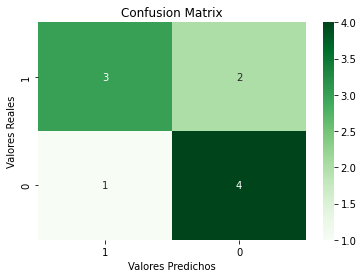

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_real = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

cm = confusion_matrix(y_real, y_pred)
print (cm)

# creación de figura
ax= plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Greens');
# annot=True to annotate cells, ftm=’g’ to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Valores Predichos')
ax.set_ylabel('Valores Reales')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])
plt.show()

# Matriz de confusión clasificación multiclase

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


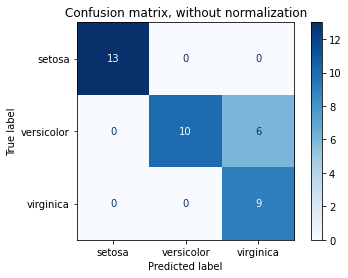

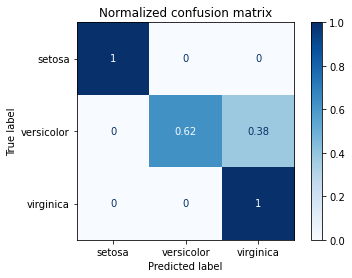

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# importación de iris dataset
iris = datasets.load_iris()

# conjunto de ejemplos
X = iris.data

# clases
y = iris.target

# nombre de las clases
class_names = iris.target_names

# división del dataSet en dos cojuntos: entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# usamos como clasificador Support Vector Classification
classifier = svm.SVC(kernel = 'linear', C = 0.01).fit(X_train, y_train)
np.set_printoptions(precision = 2)

# dos gráficas, datos sin normalizar y normalizados.
titles_options = [('Confusion matrix, without normalization', None), ('Normalized confusion matrix', 'true'), ]
for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues, normalize = normalize,)
  disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

# Precisión, accuracy

In [ ]:
# accuracy: exactitud
from sklearn.metrics import accuracy_score

y_pred = ['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true = ['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(accuracy_score(y_true, y_pred))

0.85


In [ ]:
# precision: precisión
from sklearn.metrics import precision_score

print(precision_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'A', average = 'binary'))
print(precision_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'B', average = 'binary'))

0.8
0.9


In [ ]:
# recall: exhaustividad
from sklearn.metrics import recall_score

print(recall_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'A', average = 'binary'))
print(recall_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'B', average = 'binary'))

0.8888888888888888
0.8181818181818182


In [ ]:
# media ponderada de la precisión y la exhaustividad
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred, average = 'weighted'))

0.8503759398496241


In [ ]:
# informe
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, labels=['A', 'B']))

              precision    recall  f1-score   support

           A       0.80      0.89      0.84         9
           B       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



# Dataset breast_cancer

Se trata de un conjunto formado por 569 muestras, una dimensionalidad de 30 (variables de entrada) y dos clases como salida: maligno y benigno.

In [ ]:
import numpy as np

import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import seaborn as sns

In [ ]:
# este dataset viene 'empaquetado'
data = load_breast_cancer()

In [ ]:
# 'data' - los datos del dataset
print('número de datos', len(data['data']))
print('número de atributos', len(data['data'][0]))
# 'target' - el objetivo
print('número de datos', len(data['target']))
# 'feature-names' - nombres de lor atributos
print('número de datos', len(data['feature_names']))

número de datos 569
número de atributos 30
número de datos 569
número de datos 30


In [ ]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target']))

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


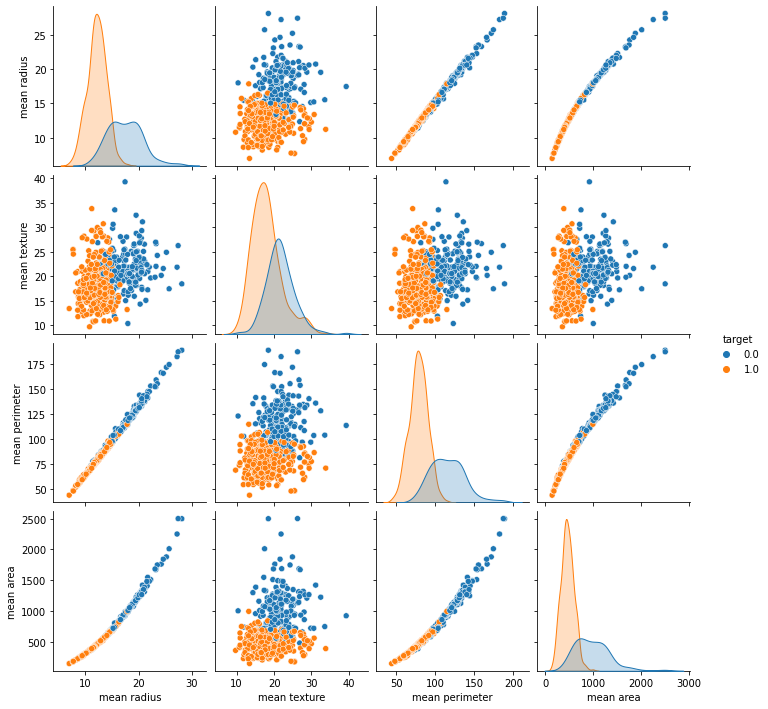

In [ ]:
# representación de las muestras por clase, de acuerdo a las variables seleccionadas (las 4 primeras)
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])

En las gráficas bidimensionales se aprecia la distribución de muestras (casos de cáncer) y su distribución de acuerdo con el valor de dos variables. En este caso particular se han tomado las cuatro primeras variables de las treinta que presenta el conjunto de datos. Las muestras pertenecientes a la clase “Maligno” (1.0) están coloreadas de naranja, mientras que las que pertenecen a la clase “Benigno” (0.0) lo están de color azul. En la representación, a simple vista, se aprecia que, en general, hay una diferencia clara entre las muestras de ambas clases en base al valor de las variables elegidas, a excepción
de la frontera entre ambas donde puede haber un mayor número de casos conflictivos que den lugar a errores puntuales en el proceso de clasificación. En general, los métodos de aprendizaje y clasificación empleados para este Dataset deberían generar un modelo que arrojase resultados por encima del 90 % dada una separación tan clara.

<AxesSubplot:>

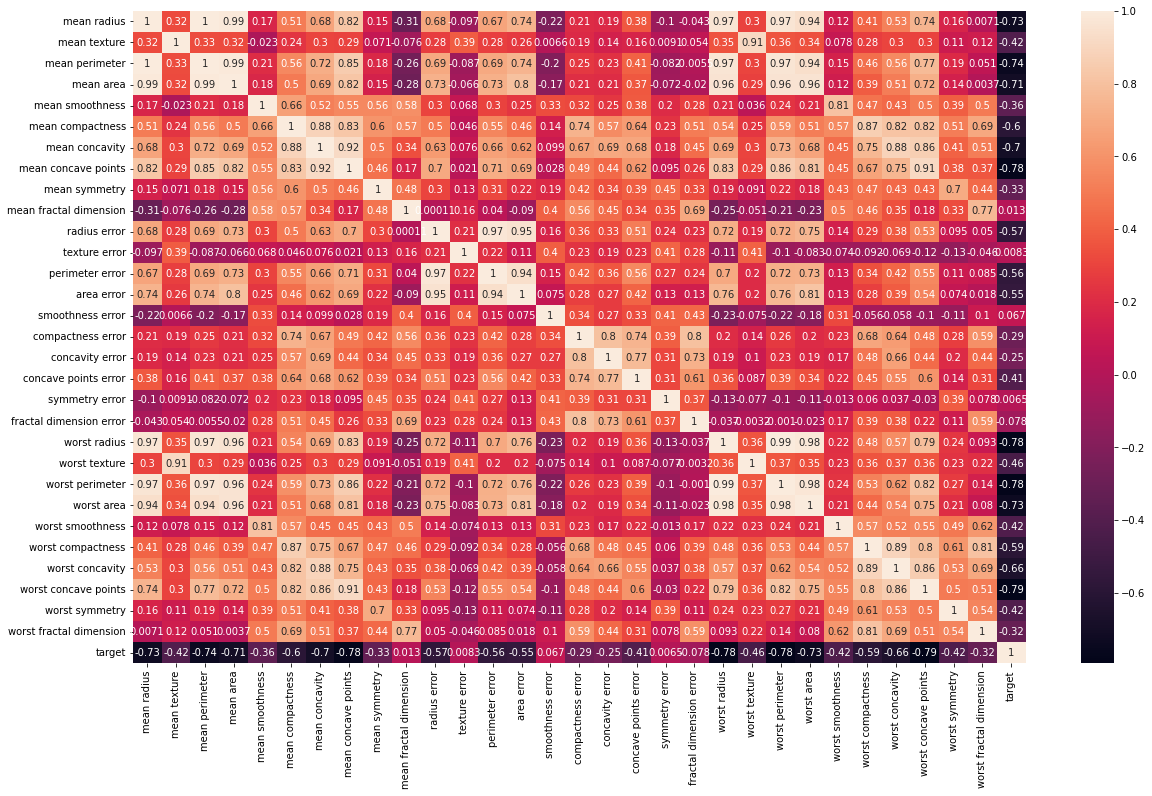

In [ ]:
# mapa de correlación entre variables
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True)

La correlación es un valor indicativo de la asociación entre dos variables.
Dos variables están asociadas cuando el valor de una nos da información acerca de la otra. El valor de correlación o magnitud está comprendido entre -1 y 1; cuando el valor de correlación entre dos variables es positivo, se denomina correlación positiva y las dos variables se correlacionan en el mismo sentido o sentido directo: si el valor de una variable crece o decrece, la otra variable lo hace con el mismo comportamiento. En cambio, cuando el valor de correlación es negativo, hablamos de una correlación negativa en donde las variables se correlacionan en sentido inverso: cuando el valor de una variable crece el de la otra decrece, y viceversa. Si la magnitud de correlación es 1 hablamos de correlación positiva perfecta y supone una determinación absoluta entre las dos variables (en sentido directo). En el caso de que el valor sea -1 hablamos de correlación negativa perfecta (en sentido inverso). Finalmente, si el valor es 0, se dice que las variables están incorrelacionadas, es decir, no se puede establecer ningún sentido en la covariación.

1.0    357
0.0    212
Name: target, dtype: int64


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cantidad de muestras por clase')

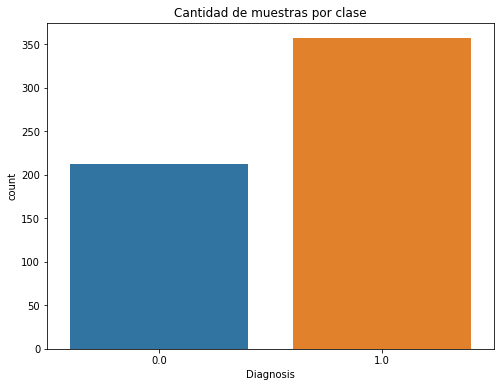

In [ ]:
# cantidad de elementos de cada clase
print(df['target'].value_counts())

# representación gráfica de la cantidad de elementos de cada clase
plt.figure(figsize = (8, 6))
sns.countplot(df['target'])
plt.xlabel('Diagnosis')
plt.title('Cantidad de muestras por clase')

In [ ]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

print('CLASES: ' + str(data.target_names))

# creamos conjuntos de aprendizaje y de test, dejando un 30% de muestras para el aprendizaje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

CLASES: ['malignant' 'benign']


In [ ]:
classifier = svm.SVC(kernel = 'linear', C = 0.01)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# matriz de confusión
cm_data = confusion_matrix(y_test, y_pred, labels = np.unique(y_test))

print('Matriz de confusión')
print(cm_data)

Matriz de confusión
[[ 57   6]
 [  5 103]]


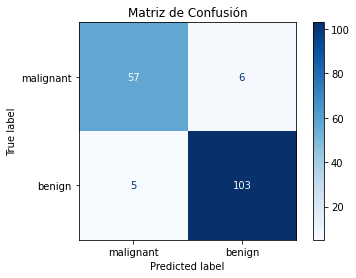

In [ ]:
# gráfica matriz de confusión
class_names = data.target_names
title = 'Matriz de Confusión'
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues)
disp.ax_.set_title(title)
plt.show()

In [ ]:
# cálculo de métricas
print('Exactitud: ' + str(accuracy_score(y_test, y_pred)))
print('Precision: ' + str(precision_score(y_test, y_pred, labels = [1, 0], pos_label = 1, average = 'binary')))
print('Recall: ' + str(recall_score(y_test, y_pred, labels = [1, 0], pos_label = 1, average = 'binary')))
print('Perdida Logarítmica: ' + str(log_loss(y_test, y_pred)))
print('Valor-F: ' + str(f1_score(y_test, y_pred, average = 'weighted')))

Exactitud: 0.935672514619883
Precision: 0.944954128440367
Recall: 0.9537037037037037
Perdida Logarítmica: 2.3185975864344366
Valor-F: 0.9355634246907591


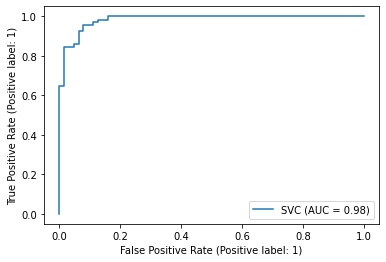

In [ ]:
# curva ROC y área AUC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

En la gráfica se puede apreciar como la curva se acerca rápidamente al
área de verdaderos positivos y el área AUC = 0.98 (98 % de probabilidad de que
un ejemplo sea correctamente clasificado), ambos indicativos del buen funcionamiento del clasificador elegido para el Dataset utilizado como ejemplo. Tal como se mencionó anteriormente, para una correcta evaluación del modelo se recomienda un mayor número de iteraciones cubriendo en la mayor medida de lo posible el espacio de muestras. Para ello se puede recurrir a una estructura iterativa (bucle) que permita la repetición de los últimos pasos indicados: división aleatoria del conjunto inicial de ejemplos y predicción, con posterior aplicación de métricas. O, también, emplear la validación cruzada.

# Creación de modelo basado en una red neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
input_shape = len(X_train.columns)
print('Numero de entradas:',input_shape)

model.add(Dense(int(len(X_train.columns)), input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(int(len(X_train.columns)/2), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

model.summary()

Numero de entradas: 30
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=int(len(X_train.columns)/3))

Epoch 1/1000
40/40 [==============================] - 1s 3ms/step - loss: 31.2096 - accuracy: 0.5930
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1456 - accuracy: 0.8970
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.8894
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7380 - accuracy: 0.8995
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8656 - accuracy: 0.8819
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1993 - accuracy: 0.8819
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.8719
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.9020
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.8869
Epoch 10/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.869

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9698
Accuracy: 96.98


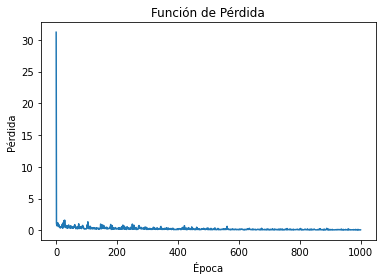

In [ ]:
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

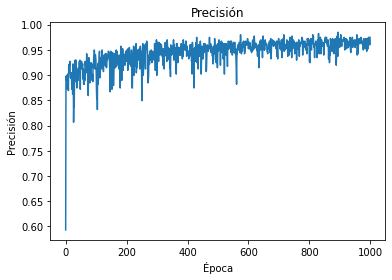

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()